# Overview

#### Here, we will be looking at a portion of code which scores participant behavioral data collected during my honors thesis project. 

# Project description

#### The overall aim of this project is to characterize the spatiotemporal neural dynamics of statistical learning (SL), a neurocognitive mechanism critical for perceptual learning. Here, participants listen to either structured or un-structured phonological sequences made up of 12 syllables while lying in a MRI scanner. The structure of the sequence is determined by transitional probabilities (TP). 

#### In the structured sequence, three phonemes were paired together to make a "word", which is the base unit repeated throughout the sequence. The un-structured sequence contained no "words" and all syllables were randomly played, thus the base unit being a single phoneme. This means that the TP across base units in the structured group is $\frac{1}{3}$[^1] and within base units is $1$, while the TP of the base unit in the un-structured group is $\frac{1}{11}$. Three decades of evidence have shown that humans are sensitive to these TP's and are able to segment continuous input using the structure as defined by the TPs. Below is an illustrative example of the TPs in the structured versus un-structured sequence given *6 syllables and 2 words* (note: the real experiment consists of 12 syllables comprising 4 words).

```mermaid
---
title: Structured TPs
---
flowchart LR

    t1((/pu/))-.->|1.0| t2((/bi/))-.->|1.0| t3((/ka/))-.->|0.33| t4((/di/))-.->|1.0| t5((/da/))-.->|1.0| t6((/bu/))
    t1---|WORD|t3
    t4---|WORD|t6
    t6--->|REPEATED|t1
    style t1 fill:#f9f,stroke:#333,stroke-width:4px,color:#000
    style t2 fill:#f9f,stroke:#333,stroke-width:4px,color:#000
    style t3 fill:#f9f,stroke:#333,stroke-width:4px,color:#000
    style t4 fill:#69f,stroke:#333,stroke-width:4px,color:#000
    style t5 fill:#69f,stroke:#333,stroke-width:4px,color:#000
    style t6 fill:#69f,stroke:#333,stroke-width:4px,color:#000

```

```mermaid
---
title: Un-structured TPs
---
flowchart LR

    t1((/pu/))-.->|0.09| t2((/bi/))-.->|0.09| t3((/ka/))-.->|0.09| t4((/di/))-.->|0.09| t5((/da/))-.->|0.09| t6((/bu/))
    style t1 fill:#f45,stroke:#333,stroke-width:4px,color:#000
    style t2 fill:#69f,stroke:#333,stroke-width:4px,color:#000
    style t3 fill:#f9f,stroke:#333,stroke-width:4px,color:#000
    style t4 fill:#451,stroke:#333,stroke-width:4px,color:#fff
    style t5 fill:#205,stroke:#333,stroke-width:4px,color:#fff
    style t6 fill:#904,stroke:#333,stroke-width:4px,color:#000

```

#### Ultimately, using advanced computational techniques--such as a [Hidden Markov Model (HMM)](https://brainiak.org/tutorials/12-hmm/)--, I expect to uncover three distinct subprocess of SL in the brain: a perceptual, encoding and predictive process.[^2] This would provide a spatially detailed and mechanistic account of SL, thus giving credence to existing evidence positing the compositionality of SL.[^3] Importantly, we must also confirm that participants actually learned (or did not learn) the structure.

#### Upon completion of the sequence in the scanner, participants exited the scanner and completed a test which assessed whether an individual learned the structure of the phonological sequence. This test is composed of a three-alternative force choiced task, in which a word from the structured sequence (dubbed "target word") is pitted against two other foil words, which have never been heard by the participant. It is the participant's job to discriminate between the foils and target word by correctly selecting the target word. Below is an example trial.

```mermaid
---
title: Example trial
---
flowchart LR

A[FOIL]-.-> B[TARGET]-.-> C[FOIL]

style A fill:#025
style B fill:#f45
style C fill:#025
```

```mermaid
flowchart LR
D[Each presentation is played sequentially with a total of 12 trials.]
```

#### The code used to determine whether participants reliably learned the structure is reviewed in this notebook. 

 [^1]: The construction of the sequences was constrained such that individual units could not immediately repeat themselves. More on the algorithm used to create sequences and its implementation can be found [here](/Honors-Thesis/README.md).
 [^2]: Information on the HMM implementation can be found [here](https://github.com/w-decker/SNL23_plots/blob/main/plotting.ipynb).
 [^3]: See [Batterink & Paller (2017)](https://www.batterinklab.com/_files/ugd/a9b75d_53f0f5269f5942cb81105ef47c84dba5.pdf) and [Moser et al. (2021)](https://www.batterinklab.com/_files/ugd/a9b75d_ab33c519fa7a406e92e68369eacfce2f.pdf)

# More on the behavioral assessment and its analysis

#### As seen above, participants had to determine the target word amidst two foil words. To assess learning, I examined whether individuals who were exposed to the structured sequence performed above chance ($0.33$) using a one-tailed one sample t-test and whether this performance was significantly greater than those exposed to the un-structured sequence using a one-tailed independent samples t-test.

#### Additionally, this experiment was executed using PsychoPy; the resulting output is convoluted and the actual results of the assessment must be extracted from a file containing highly erroneous (in our particular case) data.

#### Therefore, to analyze participant's SL abilities, I created a custom module for specifically handling the PsychoPy behavioral output. This module is located within the repo submodule. For the purposes of this notebook, I'll extract it and bring it over to the current path so as to demonstrate its functionality and usage.

# Getting the custom module

#### The custom module, named `scoring_module.py`, is housed locally and cannot be installed via `pip` or another package manager. Therefore, it must be downloaded/cloned from GitHub. I have included `scoring_module.py` as part of a $\texttt{git}$ submodule in this repo. Let's bring `scoring_module.py` into the current directory so we can actually use it. 

#### First we need to check whether it already exists in the current working directory. To see the current working directory, type `pwd` in the terminal or run `!pwd` in a Python env. Below is a function which checks whether `scoring_module.py` exists in the current directory.

In [1]:
# Import necessary modules
import os
import shutil

def does_scoring_module_exist():
    curr = os.path.abspath(os.path.dirname(__name__)) # gets current path/directory
    module = curr + '/Honors-Thesis/scoring/scoring_module.py' # string variable pointing to location of scoring_module.py

    if os.path.exists(f'{curr}/scoring_module.py'): # check if scoring_module.py is already in current path/directory
        print(f'scoring_module.py already in current directory\n')
    else: # if scoring_module.py is not in current path/directory, then add it 
        shutil.copy(module, curr)
        print(f'scoring_module.py successfully added\n')


> Note: an alternative to `curr = os.path.abspath(os.path.dirname(__name__))` is as follows.
```python
from pathlib import Path
curr = Path.cwd() # gets current path/directory
```


#### Let's call `does_scoring_module_exist()`

In [13]:
does_scoring_module_exist()

scoring_module.py succsefully added



#### As you can see, `scoring_module.py`, has now been added to a place where you and this notebook can easily access it.

# What does `scoring_module.py` consist of?

#### `scoring_module.py` is written in an object-oriented fashion. There are two classes, `Data` and `Stats`. The former cleans and prepares the data for the latter to compute the correct statistical tests mentioned in a [previous section](#more-on-the-behavioral-assessment). Overall, `scoring_module.py` is for file I/O, data cleaning and simple statistical analysis. Let's see what's actually in `scoring_module.py`.

In [13]:
!cat scoring_module.py # the '!' operator allows you to execute unix/bash commands within a Python env. This particular one prints the contents of a file

#!/usr/bin/env python

# imports for this module
import pandas as pd
import os 
from scipy.stats import ttest_1samp, ttest_ind

class Data(object):
    """Class for getting all the files you wish to analyze and putting them in a single object
    
    Parameters
    ----------
    path: str, default: current path
        Absolute path to the folder which holds data files.
        Must be in .csv format
    """

    def __init__(self, path=os.path.dirname(os.path.abspath(__name__))):
        self.path = path
        if os.path.isdir(path):
            self.files = os.listdir(self.path)
        elif os.path.isfile(path):
            self.files = path

    def parse_files(self, subids):
        """Find all of the files you wish to score
        
        Parameters
        ----------
        subids: list, str
            List of subject IDs that match the filenames. 
            Example: subids = ['sub-001', 'sub-002', 'sub-003']
        """
        
        files = []
        for id in su

# A more in-depth look at `scoring_module.py`

#### However, what we just did doesn't tell us anything important unless you're up for reading the entire module at once. For now, let's look at each class and its attributes and methods individually. To start, we must first import the module.

In [1]:
import scoring_module as sm # import scoring_module.py and give it a call heuristic
# alternatively...
# from scoring_module import Data, Stats

#### Now that we've imported the module, let's look at `Data`

In [3]:
print(sm.Data.__doc__) # prints the docstring. Certain IDEs will allow easier access to this (e.g., VSCODE or PyCharm)

Class for getting all the files you wish to analyze and putting them in a single object
    
    Parameters
    ----------
    path: str, default: current path
        Absolute path to the folder which holds data files.
        Must be in .csv format
    


#### What this is telling us is that `Data` requires a path locating the data. Let's do this! But first we need to get some data. Fortunately, there is some sample data in the $\texttt{git}$ submodule. Let's move it over here. 

In [ ]:
import os, shutil

curr = os.path.abspath(os.path.dirname(__name__)) # we've seen this before
sample_data = curr + "/Honors-Thesis/scoring/testdata/" # pointer to data
sample_data_dir = curr + "/data_dir/" # where to move data
os.makedirs(sample_data_dir) # make the directory for the data to go to
shutil.copytree(sample_data, sample_data_dir, dirs_exist_ok=True) # copies contents of subdir recursively to specified dir

#### Note that we had to make a destination folder for this process, unlike `does_scoring_module_exist()`. This is because of the functionality of `shutil.copy` versus `shutil.copytree`. You can copy entire directories more easily in the terminal by following commands below.

```bash
cp -r ./SourceDir /.DestinationDir
```

#### The folder containing the data is `data_dir`. Let's give it to `Data`.

In [2]:
import os

curr = os.path.abspath(os.path.dirname(__name__)) # we've seen this before
data_dir_pointer = curr + "/data_dir/"
data = sm.Data(path=data_dir_pointer) # assigning the object to a variable

#### But what happens next? Well, we need to use the *methods* within the `Data` class to clean and prep the data for the necessary statistical tests. To see which methods belong to the data class, let's run the following code.

In [5]:
Data_methods = [i for i in dir(sm.Data) if callable(getattr(sm.Data, i))] # This gets all of the methods and attributes of the Data class and appends it to a list

# However, this list contains some unneccessary items, so lets remove them (comment out this conditional statement to see the extra stuff)
[Data_methods.remove(i) for i in Data_methods[:] if i.startswith("__")]

# see what methods are in Data
print(Data_methods)

['clean', 'indiv_score', 'parse_files', 'rm_subs', 'score']


#### The methods are what the object can *do*. To see what is required of each method, you can call the docstring by executing the same steps to deployed to access the docstring for `Data`.

#### Let's look at what's under the hood of each method. To do this, we can use the `inspect` package, which comes preinstalled with Python.

In [7]:
from inspect import getsource # This prints the source code of a specified function, class, method, etc

print(getsource(sm.Data.parse_files))

    def parse_files(self, subids):
        """Find all of the files you wish to score
        
        Parameters
        ----------
        subids: list, str
            List of subject IDs that match the filenames. 
            Example: subids = ['sub-001', 'sub-002', 'sub-003']
        """
        
        files = []
        for id in subids:
            found= False
            for filename in self.files:
                filename2 = filename.split('_')[0]
                if id == filename2 and filename.endswith('.csv'):
                    files.append(os.path.join(self.path, filename))
                    found = True
                    break
                if not found:
                    print('Looking for more files')
        
        # return
        self.files = files
        self.numfiles = len(files)



#### If you scroll to the top of this output, you can see the docstring wrapped in tripple quotes `""" """`. You can see that this method, `parse_files`, "Find[s] all of the files you wish to score". It does this by relying on a filenaming convention established in the project. You must provide a subject ID to the method. What this code does is iterate through every file in the path you originally gave the parent class and check whether it is a `.csv` file *and* contains the subject ID(s) you've provided. This is necessary because PsychoPy outputs many files that are not needed and this particular method helps ignore those. 

#### Let's call this method.

In [3]:
subid = ["sub-001"] # provide subject ID
data.parse_files(subids=subid)

#### There is an attribute within the `Data` class which lets you look at the file(s) the program currently is holding/looking through. Let's look at what is currently in our `data` object.

In [4]:
data.files

['/Users/lendlab/Box Sync/willdecker/GitHub/GaTech_Code/data_dir/sub-001_structured_3afc.csv']

#### The above file is the exact file we provided the program. Now, we need to clean the file. As mentioned earlier, PsychoPy saves additional data that we will not be needing. To remove this, I have built a method called `clean`, which automatically removes these columns. Let's take a closer look at the source code for this method.

In [35]:
from inspect import getsource

print(getsource(sm.Data.clean))

    def clean(self):
        """Remove erroneous columns from .csv file generated from PsychoPy"""

        # remove unnecessary columns 
        label = ['example_outer_loop.thisRepN',
        'example_outer_loop.thisTrialN',
        'example_outer_loop.thisN',
        'example_outer_loop.thisIndex',
        'example_inner_loop.thisRepN',
        'example_inner_loop.thisTrialN',
        'example_inner_loop.thisN',
        'example_inner_loop.thisIndex',
        'example_shift_loop.thisRepN',
        'example_shift_loop.thisTrialN',
        'example_shift_loop.thisN',
        'example_shift_loop.thisIndex',
        'trials_loop.thisRepN',
        'trials_loop.thisTrialN',
        'trials_loop.thisN',
        'trials_loop.thisIndex',
        'transition_loop.thisRepN',
        'transition_loop.thisTrialN',
        'transition_loop.thisN',
        'transition_loop.thisIndex',
        'blocks_loop.thisRepN',
        'blocks_loop.thisTrialN',
        'blocks_loop.thisN',
        'blocks_lo

#### You can see that this method, `clean` "Remove[s] erroneous columns from .csv file generated from PsychoPy". It does this with a pre-determined list of the "to-be deleted" column headers and assigning it to the variables `labels`.

#### Using `pandas` (a powerful and widely used Python library), it drops the columns listed in the `labels` variable. Let's do this.

In [5]:
data.clean()

#### Now we can score the data. Let's look at what the `score` method does.

In [10]:
from inspect import getsource

print(getsource(sm.Data.score))

    def score(self):
        """Scoring individual participant data"""

        # create empty df for scoring
        anskey = pd.DataFrame(columns=['correct_key_resp', 'actual_key_resp', 'assign_codes', 'score'])

        str_scores = []
        rand_scores = []

        for i in self.files:

            # read in the file
            df = pd.read_csv(i)

            order = []
            if df['blocks'][5] == 'block1.csv':
                order = 1
            elif df['blocks'][5] == 'block12.csv':
                order = 2

            anskey['actual_key_resp'] = list(df['key_resp.keys'][5:29].dropna())

            # set answer key based on order set a few chunks earlier
            answers =  ['z', 'v', 'v',  'z', 'm', 'z', 'z','v', 'm','v', 'v', 'm']
            if order == 1:
                anskey['correct_key_resp'] = answers
            elif order == 2:
                anskey['correct_key_resp'] = answers[::-1]

            for j in range(12):
                if anskey['corr

#### This method is a little more involved. Let's take it step by step.

1. #### First, an empty `pandas` data frame, named `anskey`, is created and two empty vectors, `str_scores` and `rand_scores`, are initialized. 
2. #### Next, a `for` loop is initialized which iterates the within code over every file in `data.files`. 
#### Within this loop... 
* #### The `.csv` file is loaded.
* #### An empty vector, `order`, is created and a conditional `if` statement looks at `data.files[i]` (the current file in the loop) and determines the order in which the stimuli were presented (either order 1 or 2). 
> For counterbalancing, some participants completed the task in which the order of the stimuli was completed in reverse relative to the others. 
* #### Next, the participant's actual responses are loaded into `anskey`. 
* #### Based on the defined order, as determined a few lines prior, the correct answers are flipped and assigned to another column in `anskey`.
* #### Next, the code iterates between the correct answers and a participant's answers. If they match, a `1` is given to the participant. If they do not match (i.e., the participant incorrectly responded to a trial), then a `0` is given. These `1`'s and `0`'s are added to another column in `anskey`.
* #### This new columns of `1`'s and `0`s is summed and divided by the total number of trials to derive an individual `score`.
* #### Next, the filename, which contains the condition of a participant, determines whether this `score` is appended to `str_scores` or `rand_scores`.
3. #### Following the loop, a new `pandas` dataframe, `scores`, is created. It adds all values from `str_scores` and `rand_scores` to specific columns.

#### Let's score the data and look at the output.

In [6]:
data.score() # executes method
data.scores # allows us to view the scores

,structured,random
0,0.666667,NaN


#### Remember, this code is written with the intent to handle multiple participant files. With only one sample dataset, the `scores` table is realtively small. We can also check a specific subject's responses using another method, `indiv_score`. Let's look at what this does. 

In [11]:
from inspect import getsource

print(getsource(sm.Data.indiv_score))

    def indiv_score(self, subid):
        """Get score and individual responses for a single subject
        
        Parameters
        ----------
        subid: str
            single subject ID that matches filename
        """
        anskey = pd.DataFrame(columns=['correct_key_resp', 'actual_key_resp', 'assign_codes', 'score'])

        file = []
        for filename in self.files:
            if filename.split('/')[-1].split('_')[0] == subid:
                file.append(filename)
                
        df = pd.read_csv(file[0])

        order = []
        if df['blocks'][5] == 'block1.csv':
            order = 1
        elif df['blocks'][5] == 'block12.csv':
            order = 2

        anskey['actual_key_resp'] = list(df['key_resp.keys'][5:29].dropna())

        # set answer key based on order set a few chunks earlier
        answers =  ['z', 'v', 'v',  'z', 'm', 'z', 'z','v', 'm','v', 'v', 'm']
        if order == 1:
            anskey['correct_key_resp'] = answers
        

#### As you can see from the docstring, this code "Get[s] score and individual responses for a single subject". This can be beneficial for sanity checks or to review patterns of commonly missed items. `indiv_score`, requires a argument to the parameter, `subid=`. Here, you specify which particular subject you wish to view. From there, it pretty much runs the same code used in `score`, but outputs `anskey`. Let's run this code.

In [7]:
data.indiv_score(subid='sub-001')

,correct_key_resp,actual_key_resp,assign_codes,score
0,z,m,0,0.666667
1,v,z,0,NaN
2,v,v,1,NaN
3,z,z,1,NaN
4,m,m,1,NaN
5,z,z,1,NaN
6,z,m,0,NaN
7,v,m,0,NaN
8,m,m,1,NaN
9,v,v,1,NaN


#### You can also remove a specific subject from the `data.files` attribute with the method `rm_subs`, which takes an argument for the `subids` parameter. I won't actually do this for this particular example because there is only one dataset, but I will show you what the syntax for this looks like given three data sets. 

```py
data.scores # here are the score of three subjects
	structured	random
0	0.583333	NaN
1	0.520000	NaN
2	0.500000	NaN

subid = 'sub-002'
data.rm_subs(subids=subid) # remove sub-002
data.scores # now sub-002's score is no longer part of the object.
	structured	random
0	0.583333	NaN
1	0.500000	NaN
```
#### Notice that there are no values in the `random` column of `data.scores`. This is because this example dataset consisted only of data from participants who listened to structured sequences in the scanner. 

#### Importantly, you must be cautious when using this method. I have not created functionality to quickly add a single subject back into the data. Let's look at what's under the hood of `rm_subs`.

In [5]:
from inspect import getsource

print(getsource(sm.Data.rm_subs))

    def rm_subs(self, subids):
        """Remove subjects' files from object

        Parameters
        ----------
        subids: list, str
             List of subject IDs that match the filenames. 
        """

        # bring in current files
        files = self.files

        # get sub ids
        subids = subids

        # remove requested files
        _2rm = []
        for file in files:
            for id in subids:
                if file.split('/')[-1].split('_')[0] == id:
                    _2rm.append(file)

        [files.remove(i) for i in _2rm]

        # return new
        self.files = files
        self.numfiles = len(files)



#### What's happening here is the program iterates over each file and determines whether one of them matches the subject you've specified to be removed. If it finds a match, it removes it.

#### Now let's look at how we would statistically analyze this data. To do this, we can use the `Stats` class created in `scoring_module.py`, which relies on the heuristics of this dataset and experiment to smoothly compute the necessary statistical tests (mentioned in [a previous section](#more-on-the-behavioral-assessment)). Let's first check out what this class does.

In [8]:
Stats_methods = [i for i in dir(sm.Stats) if callable(getattr(sm.Stats, i))] # This gets all of the methods and attributes of the Stats class and appends it to a list

# However, this list contains some unneccessary items, so lets remove them (comment out this conditional statement to see the extra stuff)
[Stats_methods.remove(i) for i in Stats_methods[:] if i.startswith("__")]

# print class doc string and methods
print(f"""{sm.Stats.__doc__} \n 
{Stats_methods}""")

Class to compute a 1 sample, 1 tailed t-test or two-samples independant, two tailed t-test
    

     
 
['clean', 'compute', 'indiv_score', 'parse_files', 'rm_subs', 'score']


#### What's particularly interesting about this output is that it contains the same methods from `Data` with the addition of `compute`. This is the result of *parent* and *child* classes. In this case, `Data` is the parent class while `Stats` is the child class. In doing this, `Stats` inherits methods and attributes initialized within the parent class. This is done fairly easily with one to two lines of code in a child class:

```python
...
# Parent class
class Parent(object)

    def __init_(self):
        ...

# Child class
class Child(Parent)

    def __init__(self):
     super().__init__() # access parent methods and attributes
     ...
```

#### If you look at the source code for `Stats`, you will see the above synatx implemented. 

#### Now let's look at what `Stats` can do. 

#### First we need to assign the object to a variable and provide it with `data.scores`.

In [8]:
stats = sm.Stats(scores=data.scores)

#### Now, we can use the `compute` method to compute the tests we want. Let's look at the backend of this method.

In [12]:
from inspect import getsource

print(getsource(sm.Stats.compute))

    def compute(self, test, **kwargs):
        '''Method for calculating scores
        
        Parameters
        ----------
        test: str or int
            Choose which statistical test you want to computer. 
            1 or '1samp' = 1 sample, 1 tailed t-test
            2 or 'ind' = two samples, independet, two-tailed t-test

        Keyword Arguments
        -----------------
        mu: int
            Population parameter you wish to test agains. Only necessary if test = 1samp
        '''
                
        if test == 1 or test == '1samp':
            self.test = '1samp'    
        elif test == 2 or test =='ind':
            self.test = 'ind'

        self.mu = kwargs.get('mu')
        if self.mu is None and self.test == '1samp':
            raise KeyError('When conducting a 1 sample t-test, you must provide the population parameter (mu). \n +\
                           In the case of this project, mu= (1/3)')

        if self.test == '1samp':
             # compu

#### Here, you must choose which test to compute (see docstring). That's it! If you wish to do a one-sample test, then you must also provide `mu=`. This is allowed via `**kwargs`, or *keyword arguments*. These are brought into the function as a `dict` datatype. The function then searches through the dict to see if any keywords are present.

#### However, we don't have sufficient sample data to compute the necessary tests. Let's create some.

In [2]:
import pandas as pd # let's use pandas and numpy
import numpy as np

def make_some_fake_data(size: int, structured_mean: int or float, random_mean: int or float):
    """Generates some fake data mimicing the heuristic for scoring_module.Stats
    
    Parameters
    ----------
    size: int
        Number of participants

    structured_mean: int or float
        Arbitrary mean for structured group

    random_mean: int or float
        Arbitrary mean for random group
    """
    # make empty data frame with correct column names
    df = pd.DataFrame(columns=['structured', 'random'])

    # generate some fake data based on input
    df['structured'] = np.clip(np.random.normal(loc=structured_mean, size=size), a_min=0, a_max=1)
    df['random'] = np.clip(np.random.normal(loc=random_mean, size=size), a_min=0, a_max=1)

    return(df)


#### In the above code, I am using `numpy.random.normal` to create data which follows the Gaussian (normal) distribution that make parameteric statistics possible. This functionality works by providing a mean for our fake data's categories.

#### Let's execute this function and look at the data.

In [10]:
fake_data = make_some_fake_data(size=20, structured_mean=0.8, random_mean=0.255)
fake_data

,structured,random
0,1.000000,0.000000
1,0.305342,1.000000
2,1.000000,0.000000
3,1.000000,0.543859
4,1.000000,0.419944
5,0.054607,0.000000
6,0.481147,0.207765
7,1.000000,0.596798
8,1.000000,0.000000
9,1.000000,1.000000


#### Now we have some data to pass to `stats.compute`. But, because we made some new data, we need to reinitialize our object.

In [11]:
stats = sm.Stats(scores=fake_data) # reinitialize stats
test = stats.compute(test=2) # compute test

#### And that's it! Now let's see the results. This can be accessed by an attribute, `statistics`.

In [12]:
print(test.statistic)

TtestResult(statistic=4.330641323300665, pvalue=5.232029898046232e-05, df=38.0)


#### Based on this, it looks like there is no difference between groups.

# That's it!

#### Behavioral data has now been analyzed and is ready for interpretation.

#### What's great about how `scoring_module.py` works is that the data and computations do not get hidden. They are added to the object as attributes. This is great for plotting. Let's plot our behavioral results. 

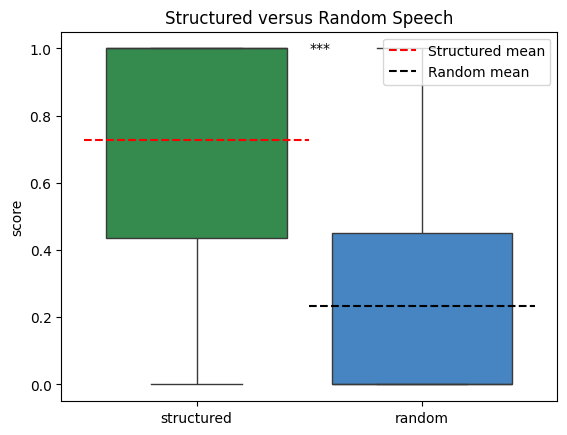

In [60]:
import seaborn as sns
import numpy as np

sns.set_palette(palette=["#269947", "#3186D6"])
ax = sns.boxplot(data=stats.scores)
ax.text(0.5, 0.988, "***");
ax.set_title("Structured versus Random Speech");
ax.set_ylabel('score')
ax.hlines(y=np.mean(stats.scores["structured"]), xmin=-0.5, xmax=0.5, 
          linestyles='dashed', color='r', label="Structured mean")
ax.hlines(y=np.mean(stats.scores["random"]), xmin=0.5, xmax=1.5, 
          linestyles='dashed', color='k', label="Random mean")
ax.legend()

#### We've now plotted our data (albeit *fake data*). 